In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [36]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing  

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
df = pd.read_csv('all_auction.csv', encoding = 'utf-8')
df.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
0,2020/12/7,永固一-KY,55461,櫃檯買賣,無擔保轉換公司債,美國標,"6,800",100,1,680,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
1,2020/12/4,信邦七,30237,櫃檯買賣,無擔保轉換公司債,美國標,"11,400",101,1,"1,140",...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
2,2020/12/4,達亞,6762,櫃檯買賣,初上櫃,美國標,"1,660",228.37,1,238,...,0,4.5,0,0,0,0,0,0.0,NaN,NaN
3,2020/12/3,森寶一,34891,櫃檯買賣,有擔保轉換公司債,美國標,900,103,1,90,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
4,2020/12/2,揚秦,2755,櫃檯買賣,初上櫃,美國標,"1,360",48,1,178,...,0,5.0,0,0,0,0,0,0.0,NaN,NaN


In [39]:
## 刪掉重複的一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='泰昇-KY')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017/1/3,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,NaN,114.5


In [40]:
## 刪掉流標的那一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='聯廣')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018/3/9,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN


In [41]:
index_name = df[(df['得標總金額(元)'] == '0')].index
df.drop(index_name, inplace = True)
df.shape

(199, 24)

In [42]:
sum(df['得標總金額(元)'] == '0')

0

In [43]:
def label_stock(row):
    if row['發行性質'] in ['有擔保轉換公司債','無擔保轉換公司債']:
        return "cb"
    else:
        return "stock"

In [44]:
df['類別'] = df.apply(lambda row : label_stock(row), axis = 1)
print('股票: %i' %(sum(df['類別'] == 'stock')))
print('可轉債: %i' %(sum(df['類別'] == 'cb')))

股票: 173
可轉債: 26


In [45]:
df_1 = df[['開標日期','證券名稱', '證券代號', '發行市場', '發行性質', '競拍數量(張)', '最低投標價格(元)', '最低每標單投標數量(張)','每一投標單投標處理費(元)', '得標手續費率(%)', '投標最後一天平均成交價', '最低得標價格(元)', '撥券日開盤價']]

In [46]:
df_1.shape

(199, 13)

In [47]:
df_1.isnull().apply(lambda x: sum(x))

開標日期              0
證券名稱              0
證券代號              0
發行市場              0
發行性質              0
競拍數量(張)           0
最低投標價格(元)         0
最低每標單投標數量(張)      0
每一投標單投標處理費(元)     0
得標手續費率(%)         0
投標最後一天平均成交價      51
最低得標價格(元)         0
撥券日開盤價            7
dtype: int64

In [48]:
df_1.dropna(inplace = True)
df_1.shape

(145, 13)

In [49]:
df_1.dtypes

開標日期              object
證券名稱              object
證券代號               int64
發行市場              object
發行性質              object
競拍數量(張)           object
最低投標價格(元)         object
最低每標單投標數量(張)       int64
每一投標單投標處理費(元)      int64
得標手續費率(%)        float64
投標最後一天平均成交價      float64
最低得標價格(元)         object
撥券日開盤價           float64
dtype: object

In [50]:
## 將這三個變數改為數值變數
obj_col = ['競拍數量(張)', '最低投標價格(元)', '最低得標價格(元)']
for col in obj_col:
    df_1[col] = df_1[col].apply(lambda x: x.replace(',', '')) 
    df_1[col] = df_1[col].apply(pd.to_numeric, errors = 'coerce')

df_1.isnull().apply(lambda x: sum(x))

開標日期             0
證券名稱             0
證券代號             0
發行市場             0
發行性質             0
競拍數量(張)          0
最低投標價格(元)        0
最低每標單投標數量(張)     0
每一投標單投標處理費(元)    0
得標手續費率(%)        0
投標最後一天平均成交價      0
最低得標價格(元)        0
撥券日開盤價           0
dtype: int64

In [51]:
df_1.dtypes

開標日期              object
證券名稱              object
證券代號               int64
發行市場              object
發行性質              object
競拍數量(張)            int64
最低投標價格(元)        float64
最低每標單投標數量(張)       int64
每一投標單投標處理費(元)      int64
得標手續費率(%)        float64
投標最後一天平均成交價      float64
最低得標價格(元)        float64
撥券日開盤價           float64
dtype: object

(array([11., 16., 25., 13., 16., 14.,  8.,  4.,  5.,  7.,  5.,  4.,  0.,
         4.,  3.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   8.92  ,   22.1308,   35.3416,   48.5524,   61.7632,   74.974 ,
          88.1848,  101.3956,  114.6064,  127.8172,  141.028 ,  154.2388,
         167.4496,  180.6604,  193.8712,  207.082 ,  220.2928,  233.5036,
         246.7144,  259.9252,  273.136 ,  286.3468,  299.5576,  312.7684,
         325.9792,  339.19  ,  352.4008,  365.6116,  378.8224,  392.0332,
         405.244 ,  418.4548,  431.6656,  444.8764,  458.0872,  

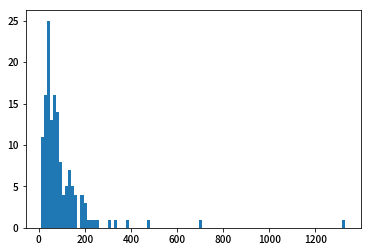

In [52]:
plt.hist(df_1['投標最後一天平均成交價'], bins = 100)

In [53]:
lam_range = np.linspace(-2,5,100)  # default nums=50
llf = np.zeros(lam_range.shape, dtype=float)

# lambda estimate:
for i,lam in enumerate(lam_range):
    llf[i] = stats.boxcox_llf(lam, df_1['投標最後一天平均成交價'])		# 欲轉換值 必須>0

# find the max lgo-likelihood(llf) index and decide the lambda
lam_best = lam_range[llf.argmax()]
print('Suitable lam is: ',round(lam_best,2))
print('Max llf is: ', round(llf.max(),2))

Suitable lam is:  -0.16
Max llf is:  -581.56


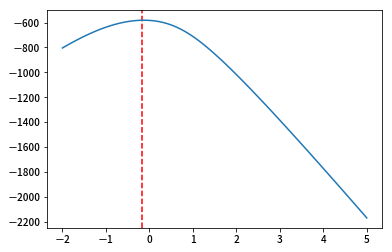

In [54]:
plt.figure()
plt.axvline(round(lam_best,2),ls="--",color="r")
plt.plot(lam_range,llf)
plt.show()

### 因為lambda接近0 使用log轉換

(array([ 1.,  2.,  0.,  0.,  0.,  0.,  2.,  3.,  2.,  3.,  3.,  3.,  3.,
         6., 16.,  6.,  2.,  3.,  8.,  8.,  9.,  8., 10.,  3.,  6.,  2.,
         8.,  3.,  7.,  1.,  5.,  3.,  2.,  1.,  0.,  1.,  1.,  1.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.18829595, 2.28838871, 2.38848148, 2.48857424, 2.58866701,
        2.68875977, 2.78885254, 2.88894531, 2.98903807, 3.08913084,
        3.1892236 , 3.28931637, 3.38940913, 3.4895019 , 3.58959466,
        3.68968743, 3.78978019, 3.88987296, 3.98996573, 4.09005849,
        4.19015126, 4.29024402, 4.39033679, 4.49042955, 4.59052232,
        4.69061508, 4.79070785, 4.89080061, 4.99089338, 5.09098615,
        5.19107891, 5.29117168, 5.39126444, 5.49135721, 5.59144997,
        5.69154274, 5.7916355 , 5.89172827, 5.99182104, 6.0919138 ,
        6.19200657, 6.29209933, 6.3921921 , 6.49228486, 6.59237763,
        6.69247039, 6.79256316, 6.89265592, 6.99274869, 7.09284146,
        7.19293422]),
 <a list of 50

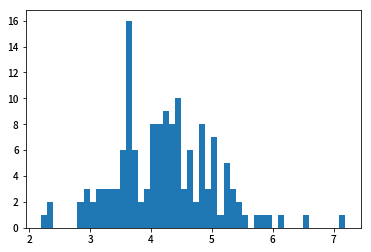

In [55]:
log_x = np.log(df_1['投標最後一天平均成交價'])
df_1['轉換後平均成交價'] = log_x
plt.hist(df_1['轉換後平均成交價'], bins = 50)

In [56]:
lam_range = np.linspace(-2,5,100)  # default nums=50
llf = np.zeros(lam_range.shape, dtype=float)

# lambda estimate:
for i,lam in enumerate(lam_range):
    llf[i] = stats.boxcox_llf(lam, df_1['最低得標價格(元)'])		# 欲轉換值 必須>0

# find the max lgo-likelihood(llf) index and decide the lambda
lam_best = lam_range[llf.argmax()]
print('Suitable lam is: ',round(lam_best,2))
print('Max llf is: ', round(llf.max(),2))

Suitable lam is:  -0.16
Max llf is:  -555.75


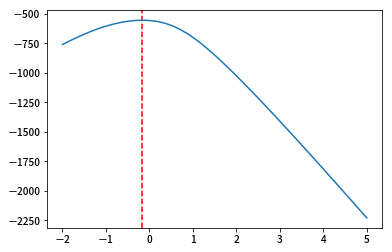

In [57]:
plt.figure()
plt.axvline(round(lam_best,2),ls="--",color="r")
plt.plot(lam_range,llf)
plt.show()

### 因為lambda接近0 使用log轉換

(array([ 1.,  2.,  0.,  0.,  0.,  2.,  0.,  4.,  1.,  5.,  3.,  2.,  9.,
         4., 15.,  3.,  4.,  3., 11.,  9.,  9., 11.,  6.,  2.,  6.,  3.,
         6.,  4.,  3.,  6.,  1.,  2.,  1.,  1.,  2.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.08193842, 2.18319301, 2.28444759, 2.38570217, 2.48695676,
        2.58821134, 2.68946592, 2.79072051, 2.89197509, 2.99322967,
        3.09448426, 3.19573884, 3.29699343, 3.39824801, 3.49950259,
        3.60075718, 3.70201176, 3.80326634, 3.90452093, 4.00577551,
        4.10703009, 4.20828468, 4.30953926, 4.41079385, 4.51204843,
        4.61330301, 4.7145576 , 4.81581218, 4.91706676, 5.01832135,
        5.11957593, 5.22083051, 5.3220851 , 5.42333968, 5.52459427,
        5.62584885, 5.72710343, 5.82835802, 5.9296126 , 6.03086718,
        6.13212177, 6.23337635, 6.33463094, 6.43588552, 6.5371401 ,
        6.63839469, 6.73964927, 6.84090385, 6.94215844, 7.04341302,
        7.1446676 ]),
 <a list of 50

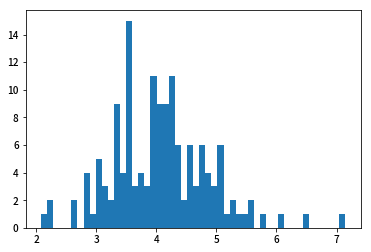

In [58]:
log_y = np.log(df_1['最低得標價格(元)'])
df_1['轉換後最低得標價格(元)'] = log_y
plt.hist(df_1['轉換後最低得標價格(元)'], bins = 50)

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


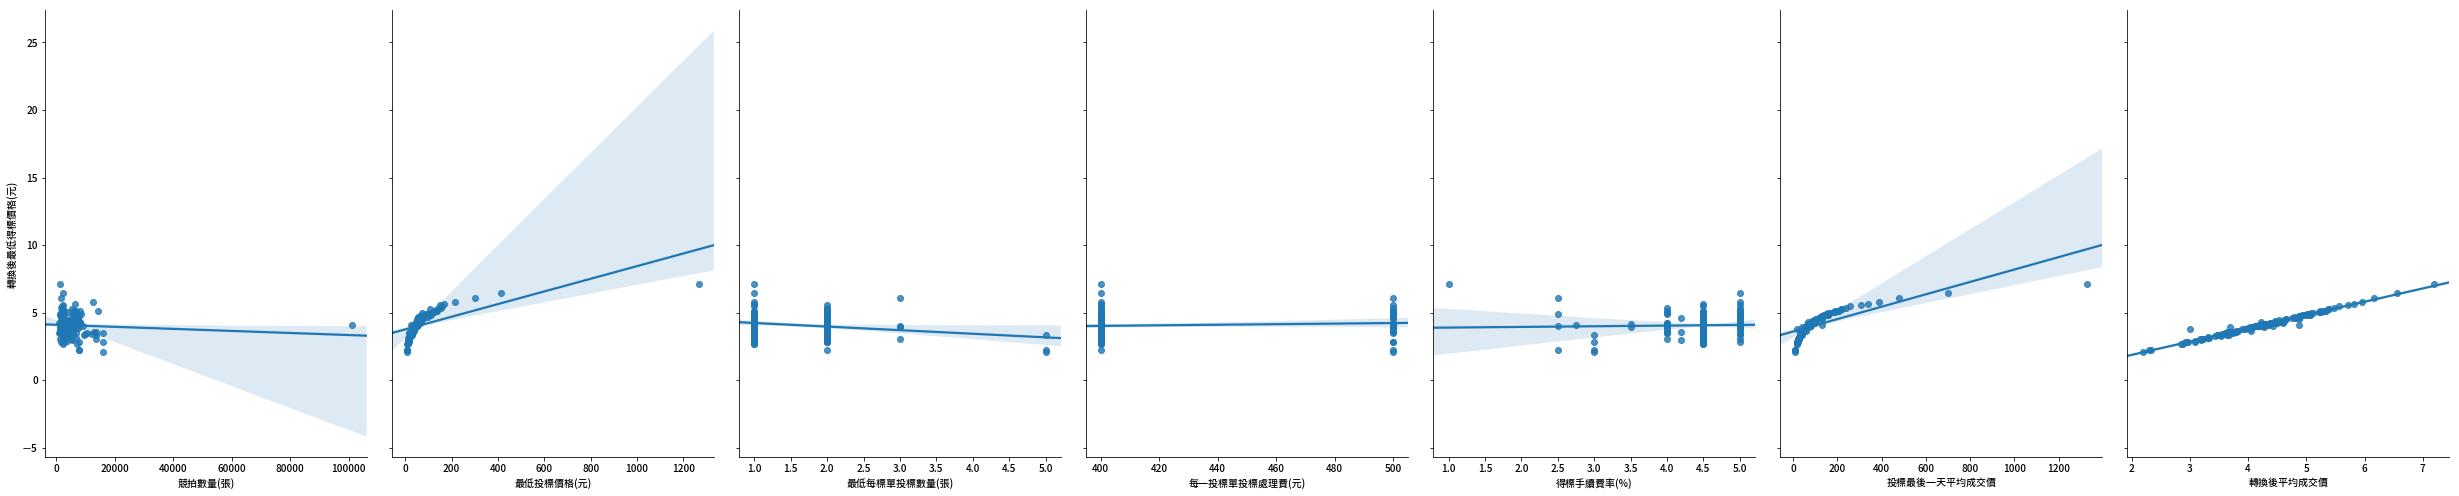

In [59]:
sn.pairplot(df_1, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價','轉換後平均成交價'], y_vars='轉換後最低得標價格(元)', size=7, aspect=0.7, kind='reg')

In [60]:
df_1['發行性質'].value_counts()
index = df_1[df_1['發行性質']=='第一上市初上市'].index
df_1.drop(index, inplace = True)

In [61]:
dummies = pd.get_dummies(df_1['發行性質'])
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['發行性質'], axis = 1, inplace = True)
df_1.drop(['初上櫃'], axis = 1, inplace = True)
df_1.drop(['上櫃增資'], axis = 1, inplace = True)   ## 將發行性質轉成類別變數 上市=1, 上櫃=0

In [62]:
dummies = pd.get_dummies(df_1['每一投標單投標處理費(元)'])
dummies.columns = ['處理費_400','處理費_500']
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['每一投標單投標處理費(元)', '處理費_500'], axis = 1, inplace = True)    ## 處理費轉為類別變數 處利費400=1, 500=0

In [63]:
dummies = pd.get_dummies(df_1['最低每標單投標數量(張)'])
dummies.columns = ['最低每標單投_1','最低每標單投_2','最低每標單投_3','最低每標單投_5']
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['最低每標單投標數量(張)', '最低每標單投_5'], axis = 1, inplace = True)
df_1.columns

Index(['開標日期', '證券名稱', '證券代號', '發行市場', '競拍數量(張)', '最低投標價格(元)', '得標手續費率(%)',
       '投標最後一天平均成交價', '最低得標價格(元)', '撥券日開盤價', '轉換後平均成交價', '轉換後最低得標價格(元)', '初上市',
       '處理費_400', '最低每標單投_1', '最低每標單投_2', '最低每標單投_3'],
      dtype='object')

In [64]:
df_1.shape

(144, 17)

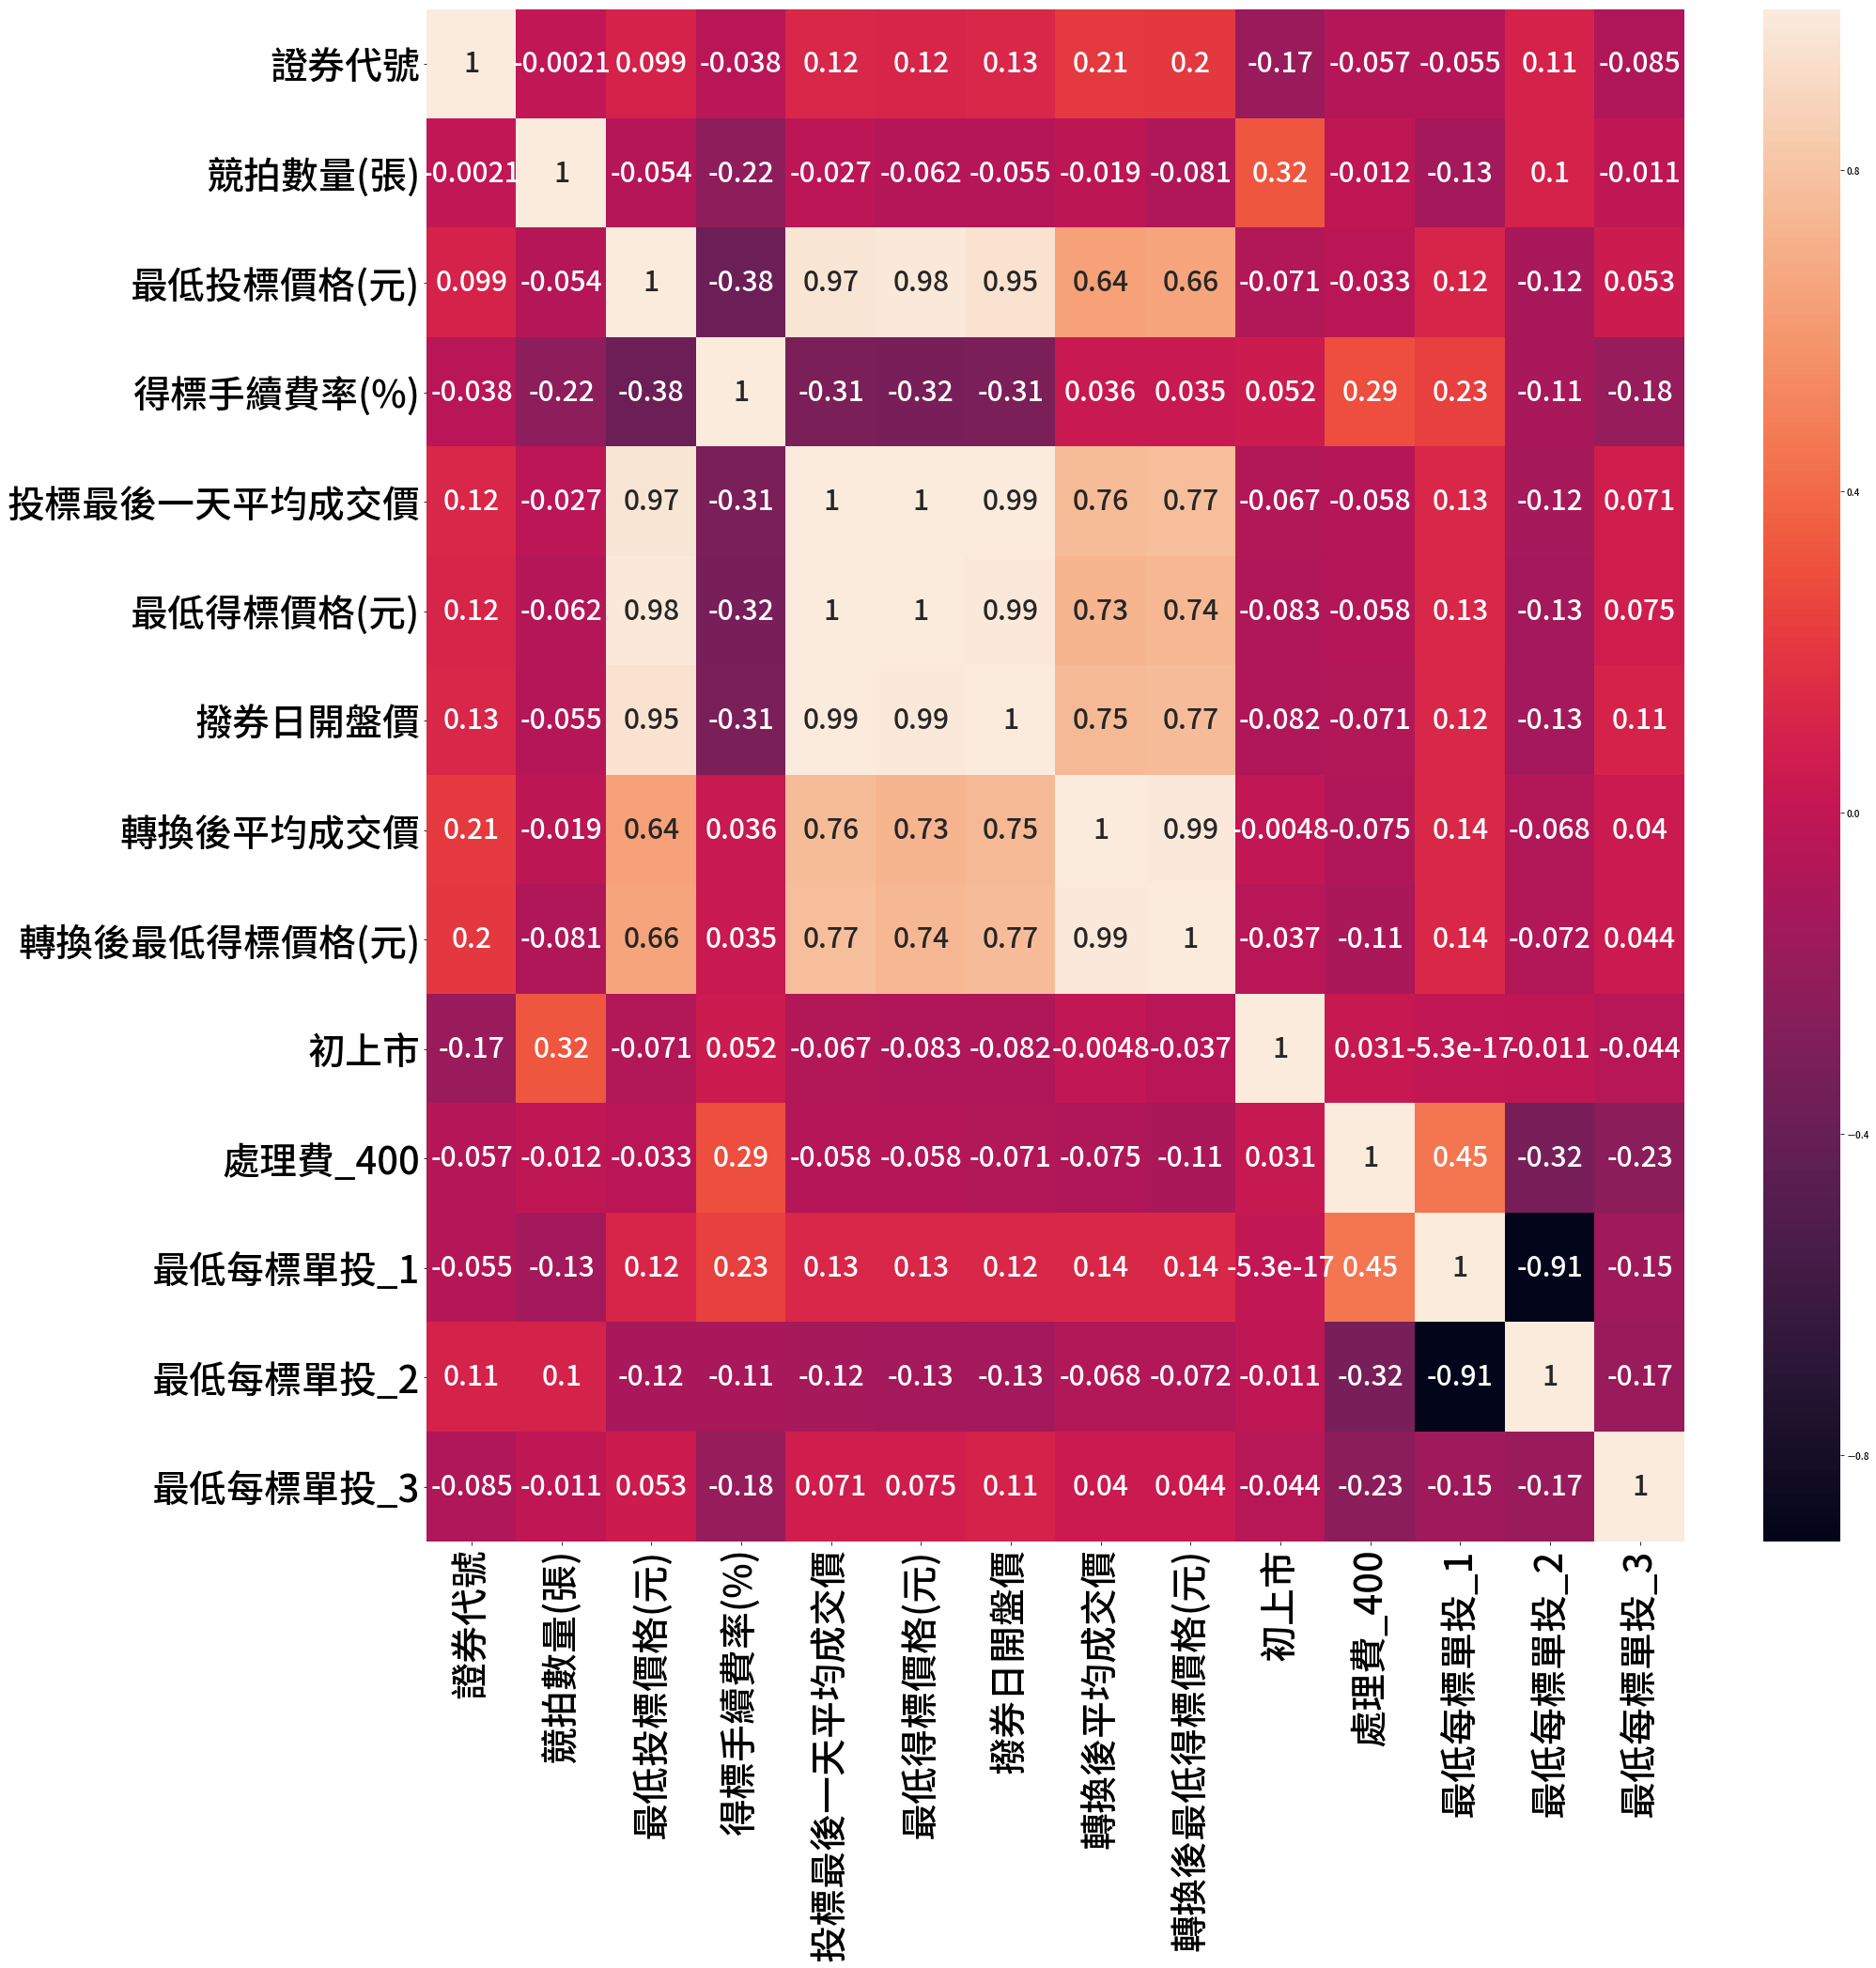

In [65]:
plt.figure(figsize=(30, 30))
corrMatrix = df_1.corr()

res = sn.heatmap(corrMatrix, annot=True, annot_kws={"size": 30})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 40, rotation = 90)

res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 40, rotation = 0)
plt.show()

In [66]:
df_1['開標日期'] = pd.to_datetime(df_1['開標日期'])
df_1['開標日期']

10    2020-11-17
11    2020-11-10
12    2020-11-06
15    2020-10-16
17    2020-10-05
         ...    
200   2016-10-13
205   2016-12-05
206   2016-12-07
207   2016-12-14
208   2016-12-16
Name: 開標日期, Length: 144, dtype: datetime64[ns]

In [67]:
df_1 = df_1.sort_values(by = '開標日期', ascending = False)
df_1.reset_index(inplace = True, drop = True)
df_1.head()

,開標日期,證券名稱,證券代號,發行市場,競拍數量(張),最低投標價格(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),撥券日開盤價,轉換後平均成交價,轉換後最低得標價格(元),初上市,處理費_400,最低每標單投_1,最低每標單投_2,最低每標單投_3
0,2020-11-17,亞泰金屬,6727,櫃檯買賣,2005,48.00,5.0,68.97,62.4,66.2,4.233672,4.133565,0,1,1,0,0
1,2020-11-10,八貫,1342,集中交易市場,4234,50.00,4.5,76.48,63.6,63.0,4.337029,4.152613,1,1,1,0,0
2,2020-11-06,陞達科技,4945,櫃檯買賣,2244,34.86,5.0,40.32,49.9,52.8,3.696848,3.910021,0,1,1,0,0
3,2020-10-16,意德士,7556,櫃檯買賣,1712,80.00,5.0,141.45,124.0,115.0,4.951946,4.820282,0,1,1,0,0
4,2020-10-05,軒郁,6703,櫃檯買賣,2040,80.08,5.0,138.26,123.0,125.0,4.929136,4.812184,0,1,1,0,0


In [68]:
test_df = df_1.iloc[:30]
train_df = df_1.iloc[30:]

In [69]:
X_train = train_df[['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','轉換後平均成交價']]
y_train = train_df['轉換後最低得標價格(元)']

In [70]:
X_test = test_df[['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','轉換後平均成交價']]
y_test = test_df['轉換後最低得標價格(元)']

In [71]:
y_train.shape, X_train.shape

((114,), (114, 9))

In [72]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,得標手續費率(%),67.63
8,轉換後平均成交價,61.89
3,最低每標單投_2,25.52
2,最低每標單投_1,16.44
7,處理費_400,5.73
0,競拍數量(張),4.20
1,最低投標價格(元),3.53
6,初上市,2.47
4,最低每標單投_3,2.27


In [73]:
x_train1 = X_train[['轉換後平均成交價', '得標手續費率(%)', '最低每標單投_1','最低每標單投_2','最低每標單投_3', '處理費_400', '競拍數量(張)', '初上市']]
x_train1_c = sm.add_constant(x_train1)
lm1 = sm.OLS(y_train, x_train1_c).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           轉換後最低得標價格(元)   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     838.8
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           1.85e-91
Time:                        22:52:34   Log-Likelihood:                 98.758
No. Observations:                 114   AIC:                            -179.5
Df Residuals:                     105   BIC:                            -154.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0727      0.099      0.734      0.464      -0.124       0.269
轉換後平均成交價       0.9810      0.013     73.162      0.000       0.954       1.008
得標手續費率(%)     -0.0185      0.017     -1.102      0.273      -0.052       0.015
最低每標單投_1      -0.0009      0.074     -0.012      0.991      -0.147       0.145
最低每標單投_2      -0.0085      0.070     -0.122      0.903      -0.147       0.130
最低每標單投_3      -0.0378      0.086     -0.442      0.659      -0.208       0.132
處理費_400       -0.0682      0.027     -2.528      0.013      -0.122      -0.015
競拍數量(張)     -2.04e-06   3.47e-06     -0.587      0.558   -8.93e-06    4.85e-06
初上市           -0.0267      0.025     -1.051      0.296      -0.077       0.024
==============================================================================
Omnibus:                      160.552   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8774.854
Skew:                           5.051   Prob(JB):                         0.00
Kurtosis:                      44.777   Cond. No.                     8.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
x_train2 = X_train[['轉換後平均成交價', '得標手續費率(%)','最低每標單投_3', '初上市']]
x_train2_c = sm.add_constant(x_train2)
lm2 = sm.OLS(y_train, x_train2_c).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           轉換後最低得標價格(元)   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1627.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           3.53e-96
Time:                        22:52:34   Log-Likelihood:                 94.953
No. Observations:                 114   AIC:                            -179.9
Df Residuals:                     109   BIC:                            -166.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0267      0.087      0.307      0.760      -0.146       0.199
轉換後平均成交價       0.9868      0.012     80.440      0.000       0.963       1.011
得標手續費率(%)     -0.0284      0.016     -1.746      0.084      -0.061       0.004
最低每標單投_3      -0.0054      0.056     -0.097      0.923      -0.116       0.105
初上市           -0.0353      0.021     -1.686      0.095      -0.077       0.006
==============================================================================
Omnibus:                      171.453   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11647.417
Skew:                           5.578   Prob(JB):                         0.00
Kurtosis:                      51.245   Cond. No.                         54.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
x_train3 = X_train[['轉換後平均成交價', '得標手續費率(%)', '初上市']]
x_train3_c = sm.add_constant(x_train3)
lm3 = sm.OLS(y_train, x_train3_c).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           轉換後最低得標價格(元)   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2189.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           6.97e-98
Time:                        22:52:34   Log-Likelihood:                 94.948
No. Observations:                 114   AIC:                            -181.9
Df Residuals:                     110   BIC:                            -171.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0256      0.086      0.298      0.766      -0.145       0.196
轉換後平均成交價       0.9868      0.012     80.924      0.000       0.963       1.011
得標手續費率(%)     -0.0281      0.016     -1.764      0.081      -0.060       0.003
初上市           -0.0352      0.021     -1.692      0.094      -0.076       0.006
==============================================================================
Omnibus:                      171.479   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11652.442
Skew:                           5.580   Prob(JB):                         0.00
Kurtosis:                      51.256   Cond. No.                         53.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
x_train4 = X_train[['轉換後平均成交價', '得標手續費率(%)']]
x_train4_c = sm.add_constant(x_train4)
lm4 = sm.OLS(y_train, x_train4_c).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           轉換後最低得標價格(元)   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     3228.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           4.45e-99
Time:                        22:52:34   Log-Likelihood:                 93.484
No. Observations:                 114   AIC:                            -181.0
Df Residuals:                     111   BIC:                            -172.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0254      0.087      0.293      0.770      -0.146       0.197
轉換後平均成交價       0.9874      0.012     80.341      0.000       0.963       1.012
得標手續費率(%)     -0.0318      0.016     -1.997      0.048      -0.063      -0.000
==============================================================================
Omnibus:                      171.798   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12021.278
Skew:                           5.581   Prob(JB):                         0.00
Kurtosis:                      52.053   Cond. No.                         53.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
x_train5 = X_train[['轉換後平均成交價']]
x_train5_c = sm.add_constant(x_train5)
lm5 = sm.OLS(y_train, x_train5_c).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           轉換後最低得標價格(元)   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     6285.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          3.17e-100
Time:                        22:52:34   Log-Likelihood:                 91.472
No. Observations:                 114   AIC:                            -178.9
Df Residuals:                     112   BIC:                            -173.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1121      0.053     -2.111      0.037      -0.217      -0.007
轉換後平均成交價       0.9872      0.012     79.278      0.000       0.963       1.012
==============================================================================
Omnibus:                      163.809   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9949.128
Skew:                           5.180   Prob(JB):                         0.00
Kurtosis:                      47.578   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
y_train_pred3 = lm3.predict(x_train3_c)
y_train_pred3_og = np.exp(y_train_pred3)
y_train_og = np.exp(y_train)
res_train_3 = y_train_og - y_train_pred3_og
print('MSE for lm3_train: %f' %(sum([i**2 for i in res_train_3])/ len(res_train_3)))

y_train_pred4 = lm4.predict(x_train4_c)
y_train_pred4_og = np.exp(y_train_pred4)
res_train_4 = y_train_og - y_train_pred4_og
print('MSE for lm4_train: %f' %(sum([i**2 for i in res_train_4])/ len(res_train_4)))


MSE for lm3_train: 67.563271
MSE for lm4_train: 67.568387


In [79]:
X_test3 = X_test[['轉換後平均成交價', '得標手續費率(%)','初上市']]
x_test_lm3 = sm.add_constant(X_test3)
y_test_pred3 = lm3.predict(x_test_lm3)
y_test_pred3_og = np.exp(y_test_pred3)
y_test_og = np.exp(y_test)
res_test_3 = y_test_og - y_test_pred3_og
print('MSE for lm3_test: %f' %(sum([i**2 for i in res_test_3])/ len(res_test_3)))

X_test4 = X_test[['轉換後平均成交價', '得標手續費率(%)']]
x_test_lm4 = sm.add_constant(X_test4)
y_test_pred4 = lm4.predict(x_test_lm4)
y_test_pred4_og = np.exp(y_test_pred4)
res_test_4 = y_test_og - y_test_pred4_og
print('MSE for lm4_test: %f' %(sum([i**2 for i in res_test_4])/ len(res_test_4)))

MSE for lm3_test: 220.934273
MSE for lm4_test: 267.636818


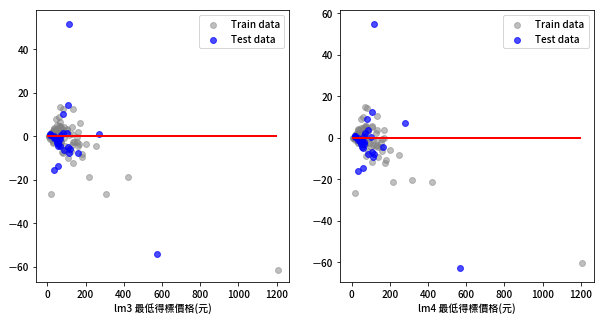

In [80]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.scatter(y_train_pred3_og, y_train_pred3_og - y_train_og,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred3_og, y_test_pred3_og - y_test_og,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('lm3 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 1200, lw = 2, color = 'red')

plt.subplot(1,2,2)
plt.scatter(y_train_pred4_og, y_train_pred4_og - y_train_og,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred4_og, y_test_pred4_og - y_test_og,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('lm4 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 1200, lw = 2, color = 'red')

## 策略1: 預測價格投一張開盤賣

In [81]:
def success_n_profit1(df_stock, pred):
    df_output = pd.DataFrame()
    df_output['最低投標價格(元)'] = df_stock['最低投標價格(元)']
    df_output['最低得標價格(元)'] = df_stock['最低得標價格(元)']
    df_output['投標價'] = pred
    df_output['撥券日開盤價'] = df_stock['撥券日開盤價']
    df_output['得標'] = 0
    df_output['得標'] = np.where(df_output['投標價'] >= df_output['最低得標價格(元)'], 1, 0)
    df_output['獲利'] = np.where(df_output['得標'] == 1, (df_output['撥券日開盤價']*1000 - (500 + df_output['投標價']*1.05*1000)), -500)
    df_output['有賺錢'] = np.where(df_output['獲利'] > 0 , 1, 0)
    df_output['累積損益'] = df_output['獲利'].cumsum()

    return df_output

In [82]:
## max_profit為用最低得標價格當投標價格

max_profit = success_n_profit1(test_df, test_df['最低得標價格(元)'])
average_wins = sum(max_profit['獲利'][max_profit['獲利'] >0]) / sum(max_profit['有賺錢'])
average_loss = sum(max_profit['獲利'][max_profit['獲利'] <0]) / sum(max_profit['有賺錢'] == 0)
print('每次都用最低得標價格得標：')
print('交易次數：%i' %(len(max_profit['獲利'])))
print('勝率：%f' %(sum(max_profit['有賺錢'])/ len(max_profit['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(max_profit['獲利'])))

每次都用最低得標價格得標：
交易次數：30
勝率：0.666667
賺賠比：4.579174
獲利：248539


In [83]:
lm3_outcome1 = success_n_profit1(test_df, y_test_pred3_og)
average_wins = sum(lm3_outcome1['獲利'][lm3_outcome1['獲利'] >0]) / sum(lm3_outcome1['有賺錢'])
average_loss = sum(lm3_outcome1['獲利'][lm3_outcome1['獲利'] <0]) / sum(lm3_outcome1['有賺錢'] == 0)
print('lm3:')
print('交易次數：%i' %(len(lm3_outcome1['獲利'])))
print('勝率：%f' %(sum(lm3_outcome1['有賺錢'])/ len(lm3_outcome1['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm3_outcome1['獲利'])))

lm3:
交易次數：30
勝率：0.200000
賺賠比：7.821538
獲利：51717


In [84]:
lm4_outcome1 = success_n_profit1(test_df, y_test_pred4_og)
average_wins = sum(lm4_outcome1['獲利'][lm4_outcome1['獲利'] >0]) / sum(lm4_outcome1['有賺錢'])
average_loss = sum(lm4_outcome1['獲利'][lm4_outcome1['獲利'] <0]) / sum(lm4_outcome1['有賺錢'] == 0)
print('lm4:')
print('交易次數：%i' %(len(lm4_outcome1['獲利'])))
print('勝率：%f' %(sum(lm4_outcome1['有賺錢'])/ len(lm4_outcome1['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm4_outcome1['獲利'])))

lm4:
交易次數：30
勝率：0.200000
賺賠比：6.630488
獲利：40409


## 策略2: 每次投注固定總金額(不超過本金為原則)

In [97]:
def success_n_profit2(df_stock, pred, principle):
    df_output = pd.DataFrame()
    df_output['最低投標價格(元)'] = df_stock['最低投標價格(元)']
    df_output['最低得標價格(元)'] = df_stock['最低得標價格(元)']
    df_output['投標價'] = pred
    df_output['撥券日開盤價'] = df_stock['撥券日開盤價']
    df_output['得標'] = 0
    df_output['得標'] = np.where(df_output['投標價'] >= df_output['最低得標價格(元)'], 1, 0)

    df_output['投標張數'] = principle // (df_output['投標價']*1000) 
    df_output['獲利'] = np.where(df_output['得標'] == 1, df_output['投標張數']* (df_output['撥券日開盤價']*1000 - (500 + df_output['投標價']*1.05*1000)), -500)
    df_output['有賺錢'] = np.where(df_output['獲利'] > 0 , 1, 0)
    df_output['累積損益'] = df_output['獲利'].cumsum()

    return df_output

In [98]:
## max_profit為用最低得標價格當投標價格

max_profit2 = success_n_profit2(test_df, test_df['最低得標價格(元)'], 2500000)
average_wins = sum(max_profit2['獲利'][max_profit2['獲利'] >0]) / sum(max_profit2['有賺錢'])
average_loss = sum(max_profit2['獲利'][max_profit2['獲利'] <0]) / sum(max_profit2['有賺錢'] == 0)
print('每次都用最低得標價格得標：')
print('交易次數：%i' %(len(max_profit2['獲利'])))
print('勝率：%f' %(sum(max_profit2['有賺錢'])/ len(max_profit2['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(max_profit2['獲利'])))

每次都用最低得標價格得標：
交易次數：30
勝率：0.666667
賺賠比：2.725985
獲利：5563896


In [103]:
lm3_outcome2

,最低投標價格(元),最低得標價格(元),投標價,撥券日開盤價,得標,投標張數,獲利,有賺錢,累積損益
0,48.00,62.40,58.121281,66.20,0,43.0,-5.000000e+02,0,-5.000000e+02
1,50.00,63.60,63.015490,63.00,0,39.0,-5.000000e+02,0,-1.000000e+03
2,34.86,49.90,34.220117,52.80,0,73.0,-5.000000e+02,0,-1.500000e+03
3,80.00,124.00,118.072511,115.00,0,21.0,-5.000000e+02,0,-2.000000e+03
4,80.08,123.00,115.444575,125.00,0,21.0,-5.000000e+02,0,-2.500000e+03
5,168.22,270.99,272.129005,300.00,1,9.0,1.238809e+05,1,1.213809e+05
6,39.00,53.90,51.780060,64.50,0,48.0,-5.000000e+02,0,1.208809e+05
7,45.08,71.39,81.498265,112.00,1,30.0,7.778047e+05,1,8.986856e+05
8,42.02,54.00,50.881164,59.20,0,49.0,-5.000000e+02,0,8.981856e+05
9,35.43,56.20,53.581112,60.90,0,46.0,-5.000000e+02,0,8.976856e+05


In [104]:
lm3_outcome2 = success_n_profit2(test_df, y_test_pred3_og, 2500000)
average_wins = sum(lm3_outcome2['獲利'][lm3_outcome2['獲利'] >0]) / sum(lm3_outcome2['有賺錢'])
average_loss = sum(lm3_outcome2['獲利'][lm3_outcome2['獲利'] <0]) / sum(lm3_outcome2['有賺錢'] == 0)
print('lm3:')
print('交易次數：%i' %(len(lm3_outcome2['獲利'])))
print('勝率：%f' %(sum(lm3_outcome2['有賺錢'])/ len(lm3_outcome2['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm3_outcome2['獲利'])))

lm3:
交易次數：30
勝率：0.200000
賺賠比：6.142216
獲利：941442


In [101]:
lm4_outcome2 = success_n_profit2(test_df, y_test_pred4_og, 2500000)
average_wins = sum(lm4_outcome2['獲利'][lm4_outcome2['獲利'] >0]) / sum(lm4_outcome2['有賺錢'])
average_loss = sum(lm4_outcome2['獲利'][lm4_outcome2['獲利'] <0]) / sum(lm4_outcome2['有賺錢'] == 0)
print('lm4:')
print('交易次數：%i' %(len(lm4_outcome2['獲利'])))
print('勝率：%f' %(sum(lm4_outcome2['有賺錢'])/ len(lm4_outcome2['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm4_outcome2['獲利'])))

lm4:
交易次數：30
勝率：0.200000
賺賠比：5.909125
獲利：866230


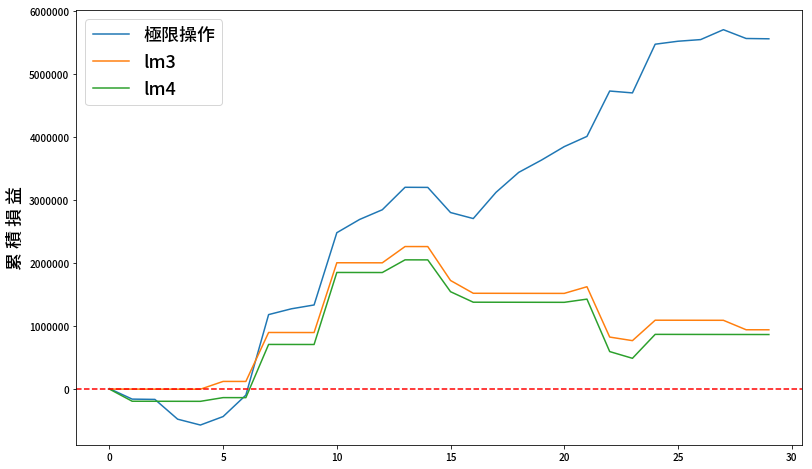

In [102]:
plt.figure(figsize = (13, 8))
plt.plot(max_profit2['累積損益'], label = '極限操作')
plt.plot(lm3_outcome2['累積損益'], label = 'lm3')
plt.plot(lm4_outcome2['累積損益'], label = 'lm4')

plt.axhline(0, color = 'r', linestyle = '--')
plt.ylabel('累 積 損 益', fontsize = 18)
plt.legend(fontsize = 18)